# Task 6 - Level 2 - Wine Quality Prediction

The focus is on predicting the quality of wine based on its chemical characteristics, offering a real-world application of machine learning in the context of viticulture. The dataset encompasses diverse chemical attributes, including density and acidity, which serve as the features for three distinct classifier models.

<b> Dataset - </b> https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

<b> Done By </b> - Shweta Alukuru Trikutam

## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


## 2. Data Loading and Understanding

In [2]:
df = pd.read_csv(r"C:\Users\shwet\Downloads\WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [4]:
df.shape

(1143, 13)

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


### <b> Checking for Missing Values

In [6]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

> No missing values present

## 3. EDA

### 3.1 Feature Distribution

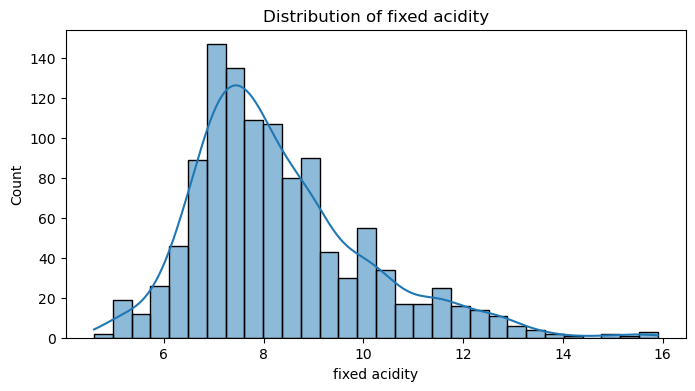

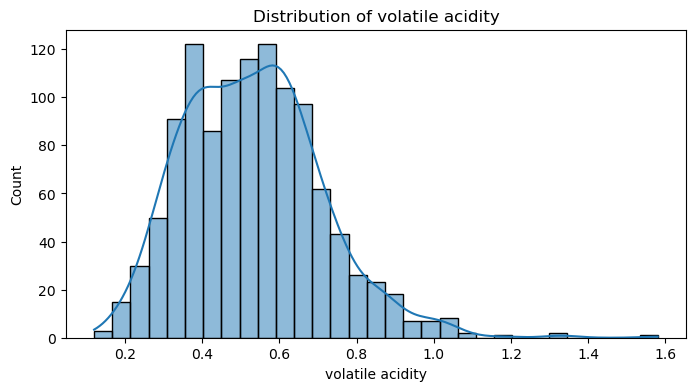

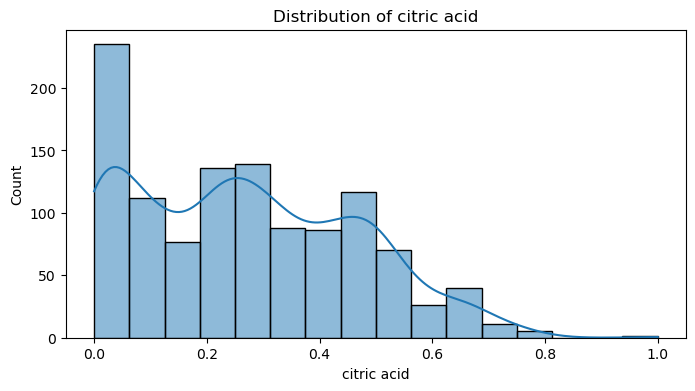

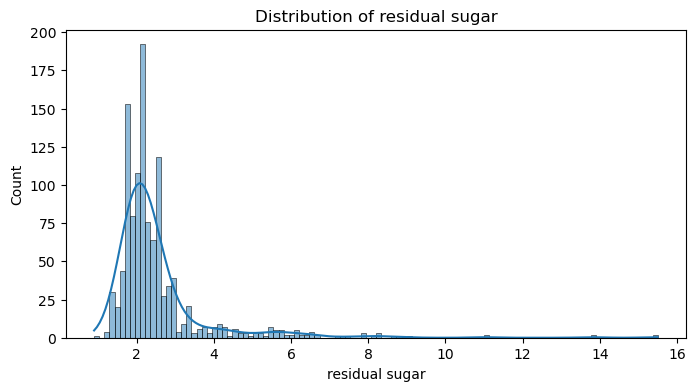

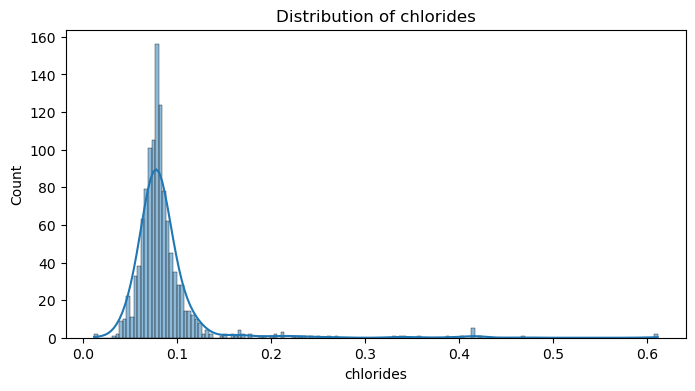

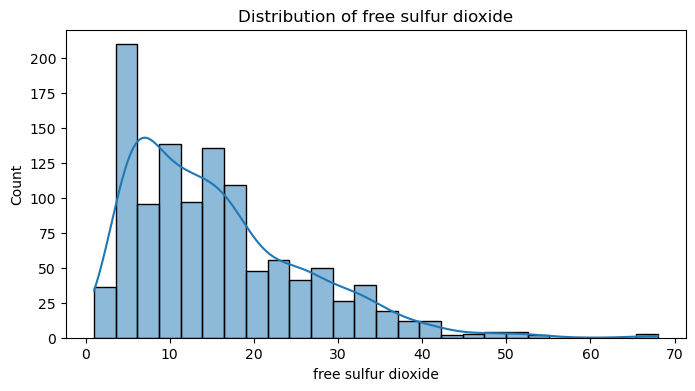

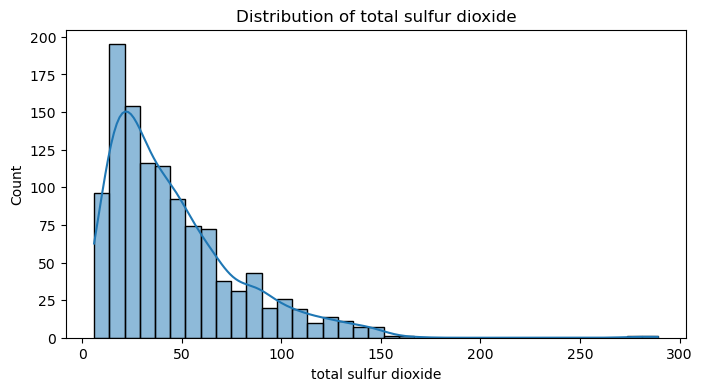

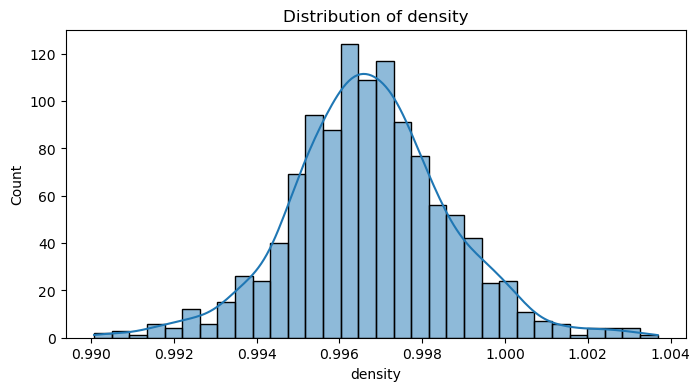

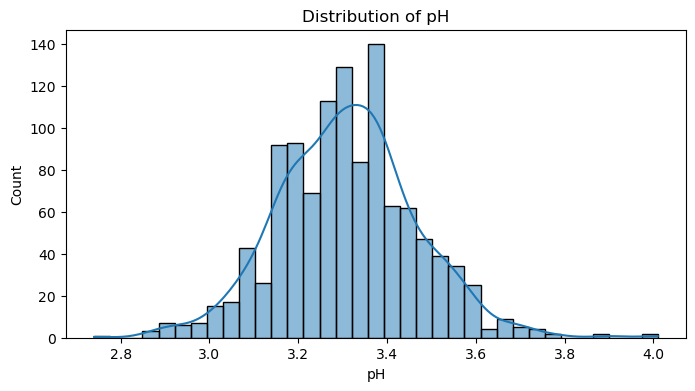

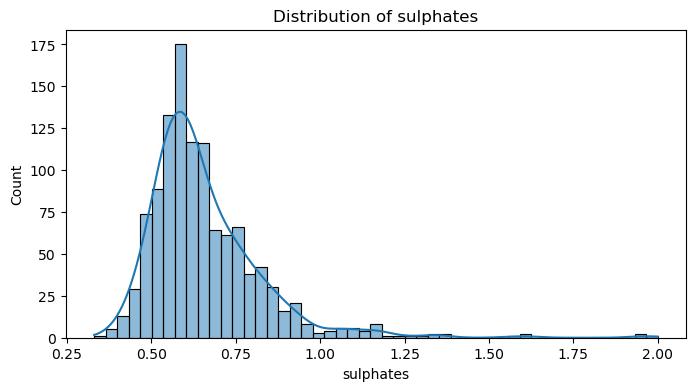

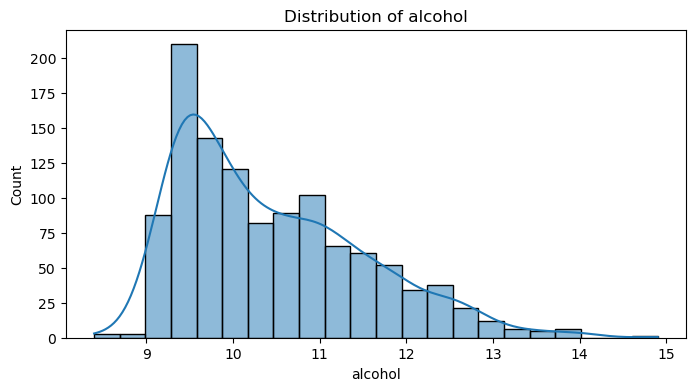

In [7]:
for col in df.columns[:-2]:  # Exclude 'quality' and 'Id'
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


### 3.2 Feature vs. Quality Box Plots

1. Using box plots to examine the distribution of each feature across different wine quality levels.
2. This can highlight trends, such as whether higher acidity correlates with higher quality.

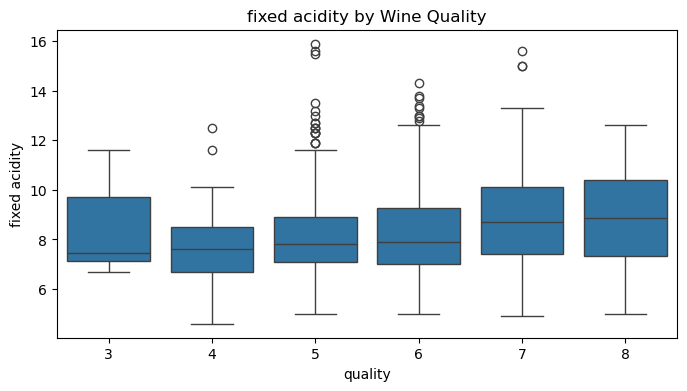

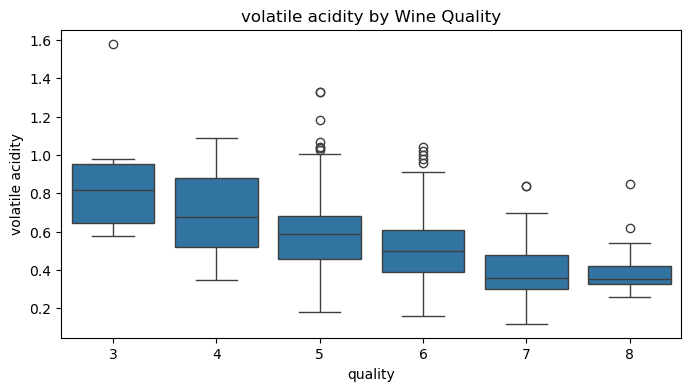

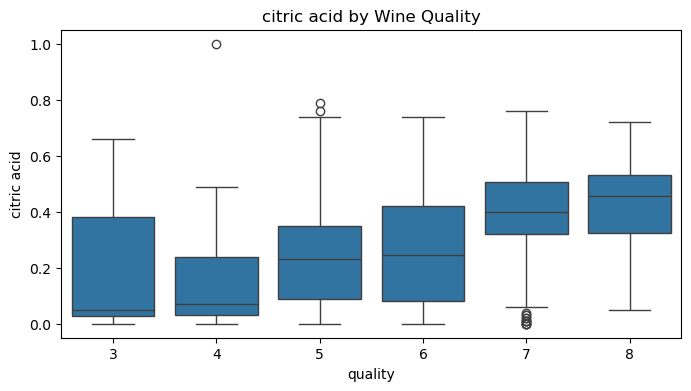

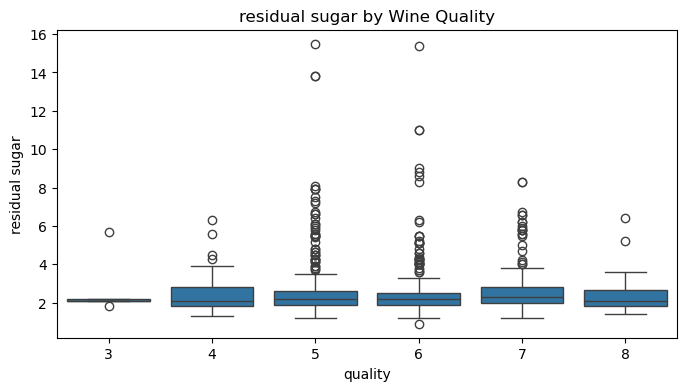

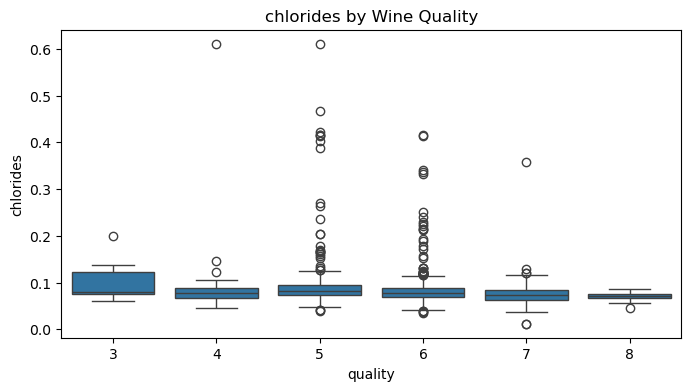

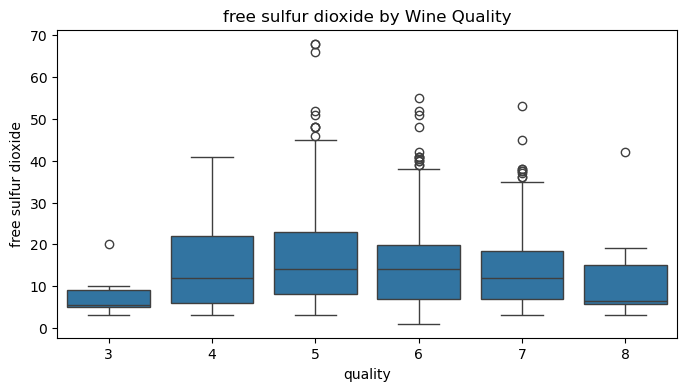

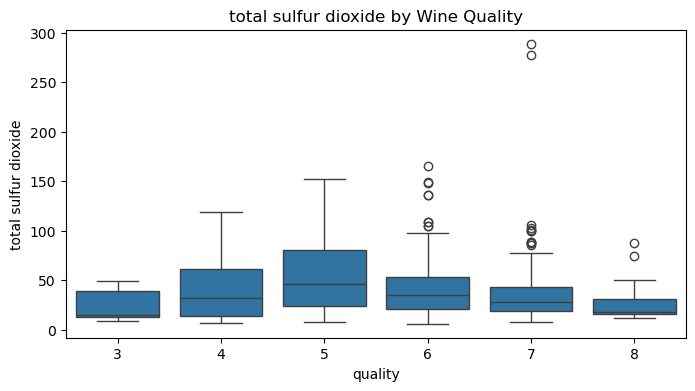

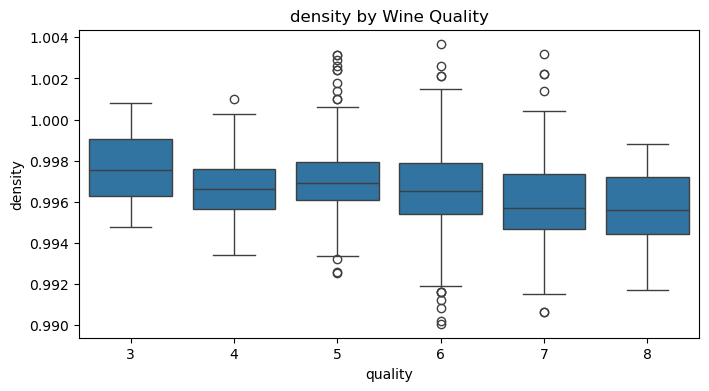

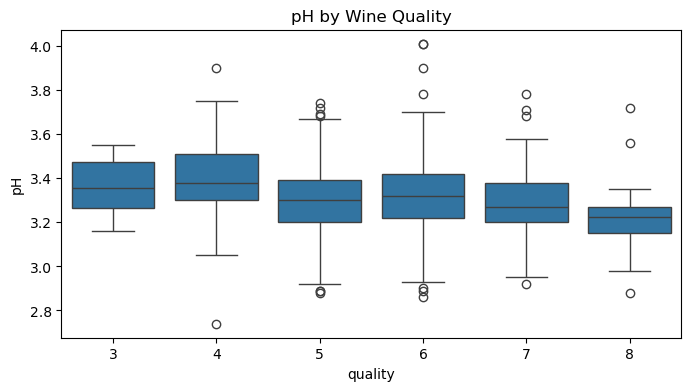

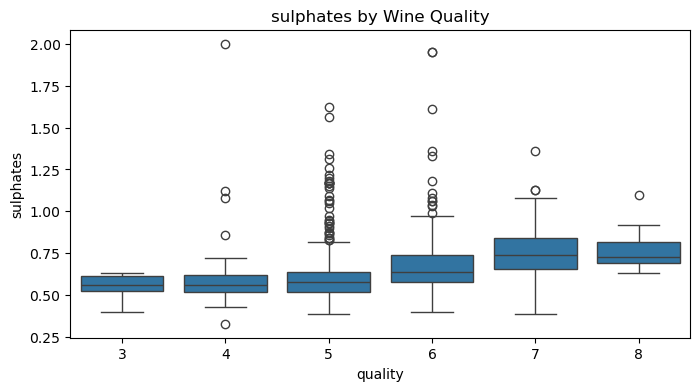

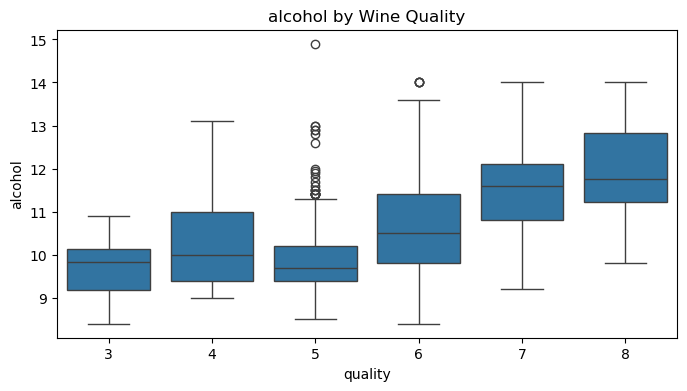

In [8]:
for col in df.columns[:-2]:  # Exclude 'quality' and 'Id'
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='quality', y=col, data=df)
    plt.title(f"{col} by Wine Quality")
    plt.show()


### 3.3 Pair Plot:

Visualizing relationships between pairs of features, colored by wine quality. This can reveal clusters or separations between quality levels.

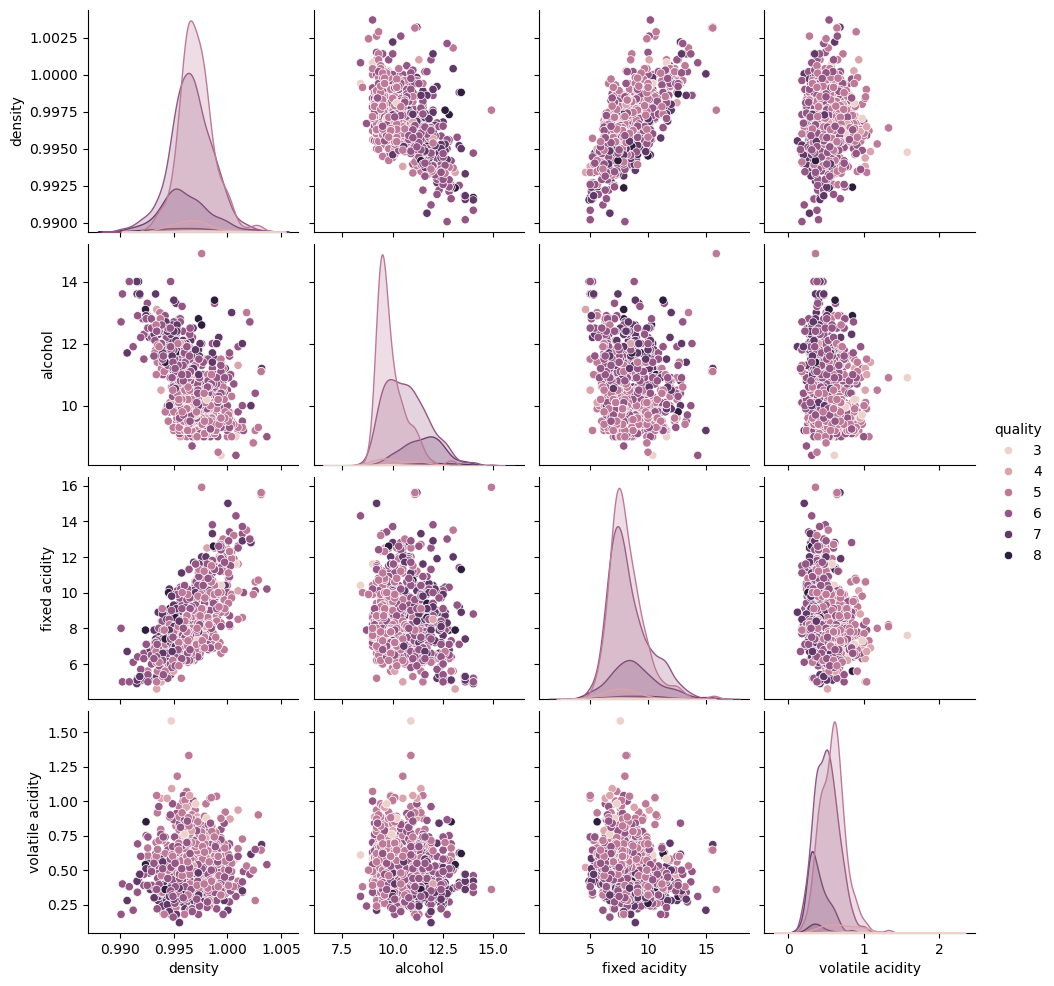

In [9]:
sns.pairplot(df, vars=['density', 'alcohol', 'fixed acidity', 'volatile acidity'], hue='quality')
plt.show()


### 3.4 Heatmap of Correlations

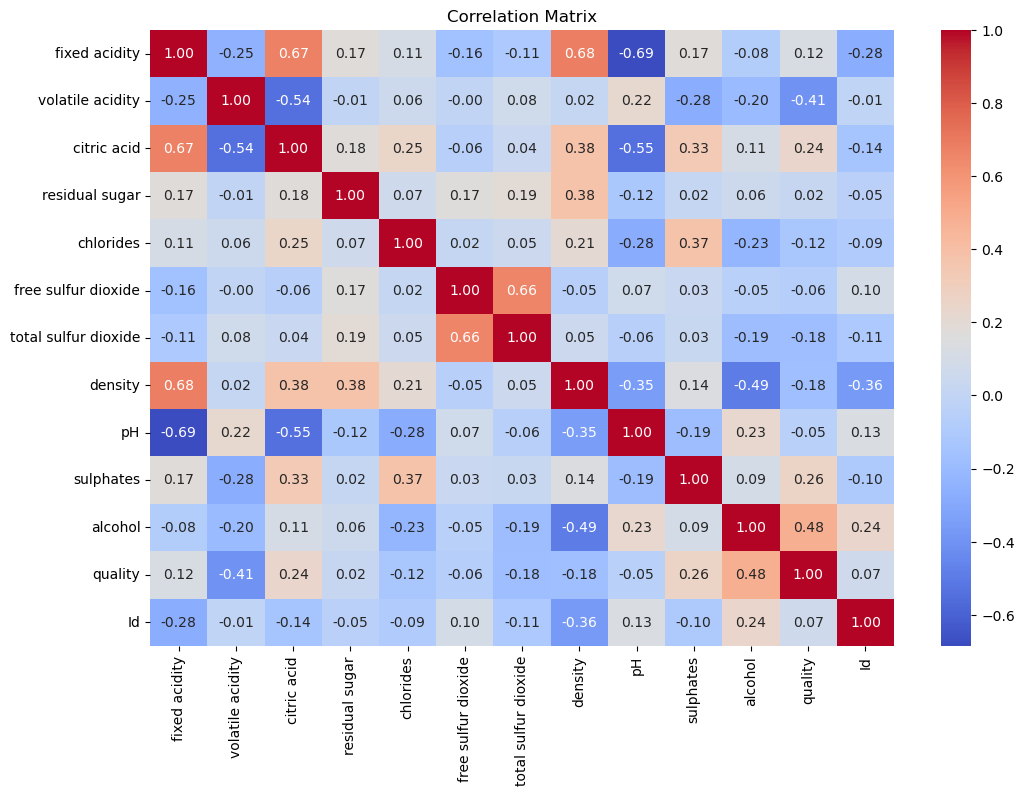

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


### 3.5 Density and Alcohol Interaction:

Since density and alcohol are known to influence wine quality, plot a scatter plot of these two features colored by quality.

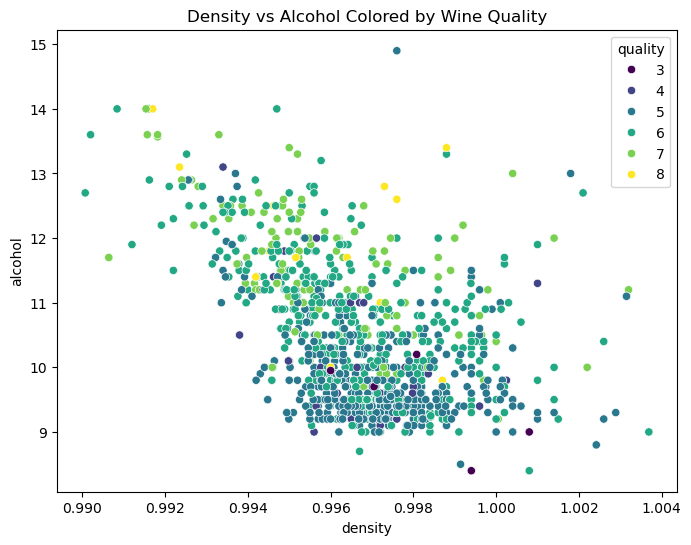

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='density', y='alcohol', hue='quality', data=df, palette='viridis')
plt.title("Density vs Alcohol Colored by Wine Quality")
plt.show()


### 3.6 pH vs Acidity Analysis:

Examining the relationship between pH and fixed acidity/volatile acidity, as acidity levels and pH are inversely related but impact quality.

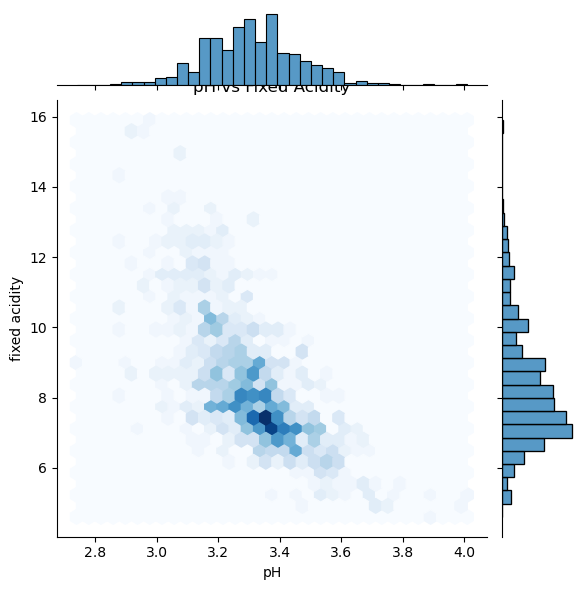

In [12]:
sns.jointplot(x='pH', y='fixed acidity', data=df, kind='hex', cmap='Blues')
plt.title("pH vs Fixed Acidity")
plt.show()


### 3.7 Sulfur Dioxide Impact:

Ploting free sulfur dioxide and total sulfur dioxide against quality to understand if these preservatives affect quality.

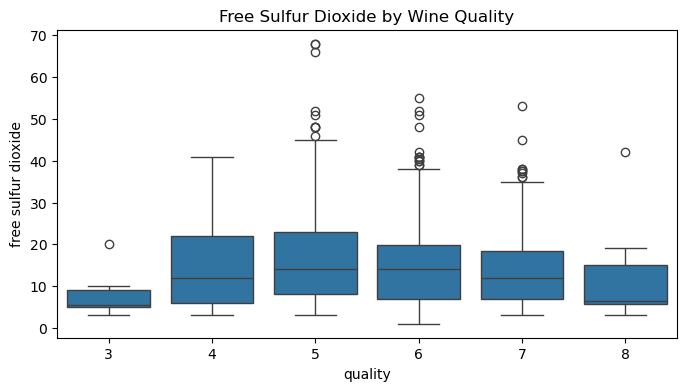

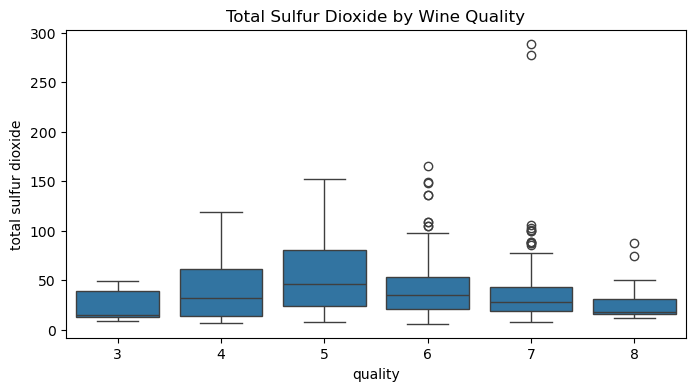

In [13]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='quality', y='free sulfur dioxide', data=df)
plt.title("Free Sulfur Dioxide by Wine Quality")
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x='quality', y='total sulfur dioxide', data=df)
plt.title("Total Sulfur Dioxide by Wine Quality")
plt.show()


## 4. Data Pre-processing

### 4.1 <b> Feature Selection </b>

1. Exclude the Id column: This is an identifier, so it doesn't contribute to the prediction of wine quality.
2. Set quality as the target variable and use all other features (excluding Id) as predictors

In [14]:
# Drop the Id column
df = df.drop(columns=['Id'])

# Define features (X) and target (y)
X = df.drop(columns=['quality'])  # Features
y = df['quality']  # Target variable


### 4.2 <b>Feature Engineering Insights</b>

Calculating ratios, such as volatile acidity / fixed acidity, to see if the balance between different types of acidity correlates with quality.

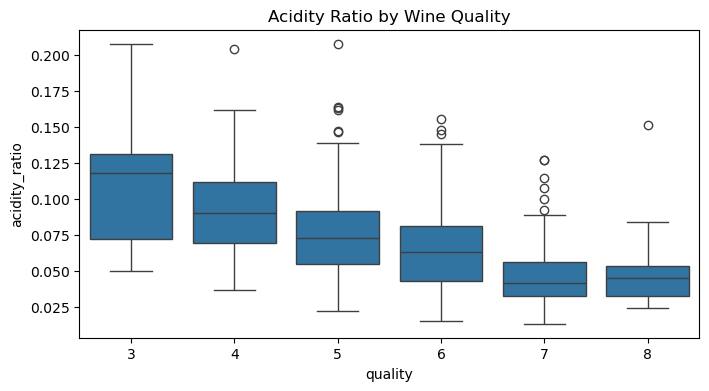

In [15]:
df['acidity_ratio'] = df['volatile acidity'] / df['fixed acidity']
plt.figure(figsize=(8, 4))
sns.boxplot(x='quality', y='acidity_ratio', data=df)
plt.title("Acidity Ratio by Wine Quality")
plt.show()


### <b> Log-Transformations for Skewed Data</b>
Applying a log transformation on skewed features, like residual sugar or chlorides, if their distribution is highly skewed. Re-evaluate feature distributions after transformations.

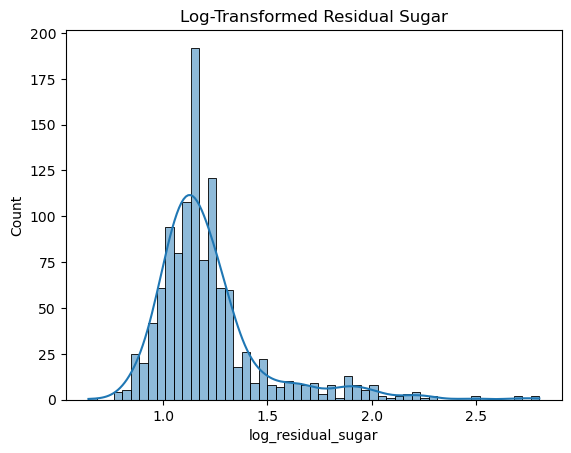

In [16]:
df['log_residual_sugar'] = np.log1p(df['residual sugar'])
sns.histplot(df['log_residual_sugar'], kde=True)
plt.title("Log-Transformed Residual Sugar")
plt.show()


### <b> Principal Component Analysis (PCA)</b>
Using PCA to reduce the feature space to 2-3 dimensions, and visualize how wine samples cluster based on quality in the reduced space.

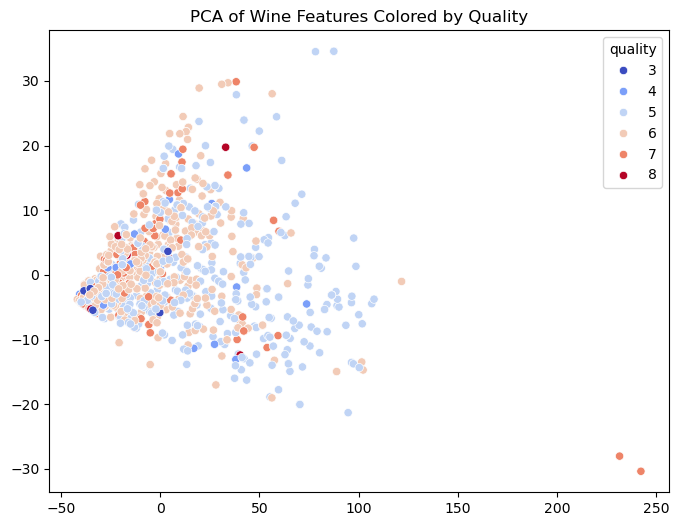

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df.drop(['quality'], axis=1))

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['quality'], palette='coolwarm')
plt.title("PCA of Wine Features Colored by Quality")
plt.show()


### 4.3 Data Scaling 

In [18]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## 5. Model Building

In [19]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [20]:
# Model Training and Evaluation
models = {
    "Random Forest": RandomForestClassifier(),
    "SGD Classifier": SGDClassifier(),
    "SVC": SVC()
}

Random Forest - Accuracy: 0.6943231441048034
Random Forest - Precision: 0.6688229118511448
Random Forest - Recall: 0.6943231441048034
Random Forest - F1 Score: 0.6809170305676856
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.73      0.79      0.76        96
           6       0.66      0.68      0.67        99
           7       0.67      0.62      0.64        26
           8       0.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.41      0.42      0.41       229
weighted avg       0.67      0.69      0.68       229



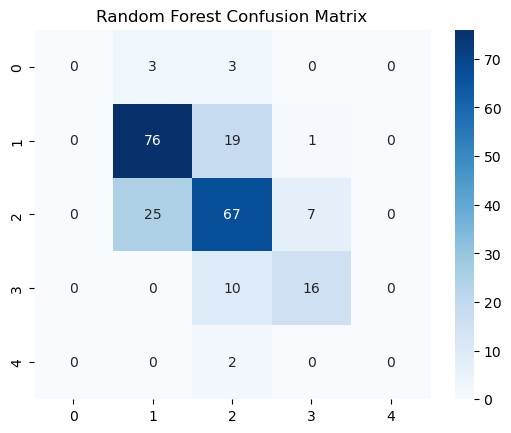

SGD Classifier - Accuracy: 0.5720524017467249
SGD Classifier - Precision: 0.5479360099489832
SGD Classifier - Recall: 0.5720524017467249
SGD Classifier - F1 Score: 0.5562640110240462
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.67      0.72      0.69        96
           6       0.54      0.59      0.56        99
           7       0.23      0.12      0.15        26
           8       1.00      0.50      0.67         2

    accuracy                           0.57       229
   macro avg       0.49      0.38      0.41       229
weighted avg       0.55      0.57      0.56       229



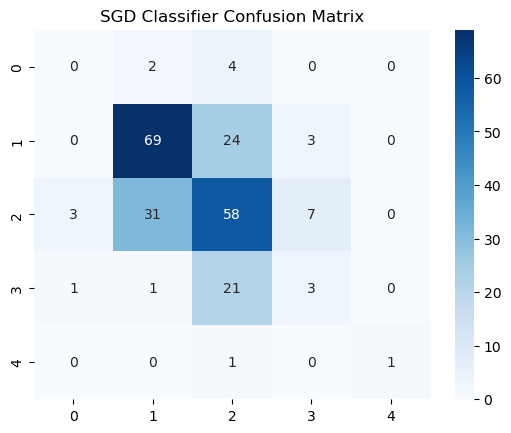

SVC - Accuracy: 0.6375545851528385
SVC - Precision: 0.6114597334045156
SVC - Recall: 0.6375545851528385
SVC - F1 Score: 0.6176733219517373
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.70      0.74      0.72        96
           6       0.59      0.69      0.64        99
           7       0.54      0.27      0.36        26
           8       0.00      0.00      0.00         2

    accuracy                           0.64       229
   macro avg       0.37      0.34      0.34       229
weighted avg       0.61      0.64      0.62       229



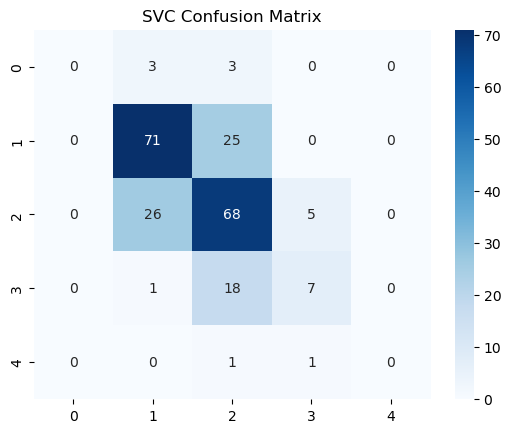

In [21]:

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} - Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"{name} - Precision: {precision_score(y_test, y_pred, average = 'weighted')}")
    print(f"{name} - Recall: {recall_score(y_test, y_pred, average = 'weighted')}")
    print(f"{name} - F1 Score: {f1_score(y_test, y_pred, average = 'weighted')}")
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.show()

## 6. Cross Validation

In [22]:
from sklearn.model_selection import cross_val_score

# Cross-validation (5-fold) for each model
for name, model in models.items():
    cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    print(f"{name} Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Random Forest Cross-Validation Accuracy: 0.5871 ± 0.0301
SGD Classifier Cross-Validation Accuracy: 0.5415 ± 0.0455
SVC Cross-Validation Accuracy: 0.6002 ± 0.0353


## 7. HyperParameter Tuning

### 7.1 Random Forest

In [23]:
from sklearn.model_selection import GridSearchCV

rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

print("Best parameters for Random Forest:", rf_grid_search.best_params_)
print("Best cross-validation accuracy for Random Forest:", rf_grid_search.best_score_)


Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation accuracy for Random Forest: 0.6508857262955624


### 7.2 Stochastic Gradient Descent (SGD)

In [24]:
sgd_params = {
    'loss': ['hinge', 'log'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01]
}

sgd_grid_search = GridSearchCV(SGDClassifier(), sgd_params, cv=5, scoring='accuracy')
sgd_grid_search.fit(X_train, y_train)

print("Best parameters for SGD:", sgd_grid_search.best_params_)
print("Best cross-validation accuracy for SGD:", sgd_grid_search.best_score_)


Best parameters for SGD: {'alpha': 0.001, 'loss': 'hinge', 'penalty': 'l2'}
Best cross-validation accuracy for SGD: 0.5710802858343842


### 7.3 Support Vector Classifier (SVC)

In [25]:
svc_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svc_grid_search = GridSearchCV(SVC(), svc_params, cv=5, scoring='accuracy')
svc_grid_search.fit(X_train, y_train)

print("Best parameters for SVC:", svc_grid_search.best_params_)
print("Best cross-validation accuracy for SVC:", svc_grid_search.best_score_)


Best parameters for SVC: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation accuracy for SVC: 0.6170059448747974


## 8. Results, Interpretation and Visualization

### 8.1 Feature Importance(Randome Forest):


In [26]:
# Retrieve feature importances from the best Random Forest model
best_rf_model = rf_grid_search.best_estimator_
feature_importances = best_rf_model.feature_importances_

In [27]:
# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

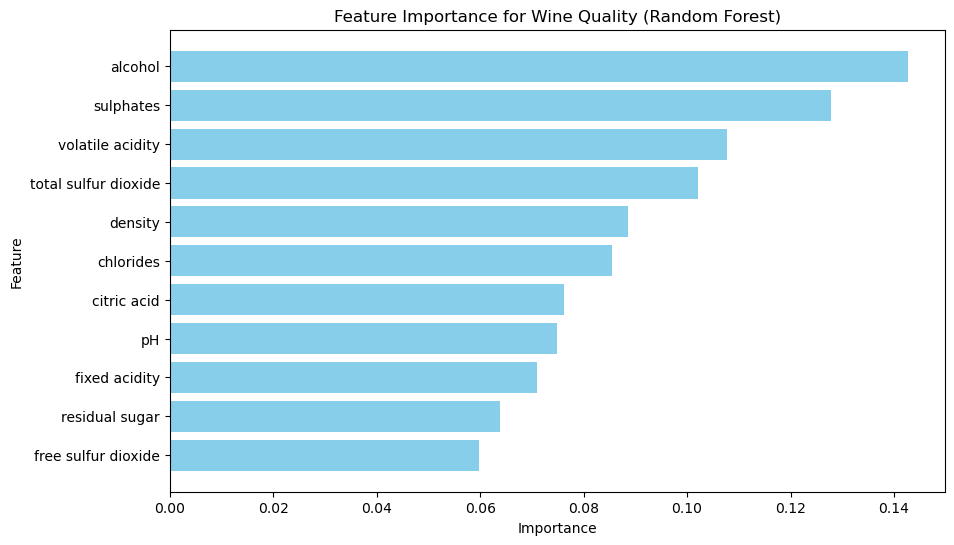

In [28]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Wine Quality (Random Forest)')
plt.gca().invert_yaxis()
plt.show()

> Insights - Key Features Impacting Wine Quality:
1. Alcohol Content
2. Sulphates
3. Volatile Acidity
4. Total Sulfur dioxide
5. Density

### 8.2 Model Performance Comparison

<Figure size 1400x800 with 0 Axes>

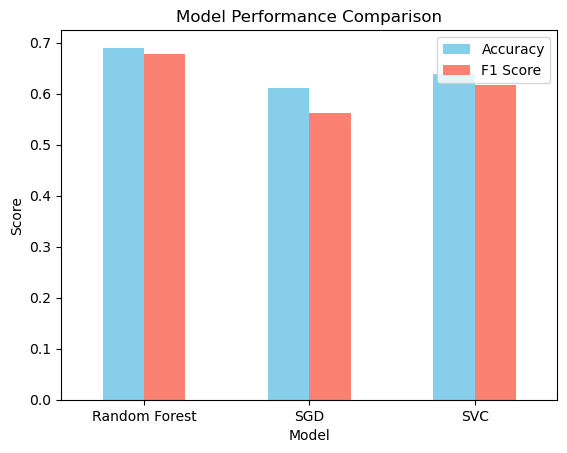

In [29]:
# Store metrics in a dictionary for comparison
model_metrics = {
    'Model': ['Random Forest', 'SGD', 'SVC'],
    'Accuracy': [accuracy_score(y_test, rf_grid_search.predict(X_test)),
                 accuracy_score(y_test, sgd_grid_search.predict(X_test)),
                 accuracy_score(y_test, svc_grid_search.predict(X_test))],
    'F1 Score': [f1_score(y_test, rf_grid_search.predict(X_test), average='weighted'),
                 f1_score(y_test, sgd_grid_search.predict(X_test), average='weighted'),
                 f1_score(y_test, svc_grid_search.predict(X_test), average='weighted')]
}

metrics_df = pd.DataFrame(model_metrics)

# Plot the metrics
plt.figure(figsize=(14, 8))
metrics_df.plot(x='Model', y=['Accuracy', 'F1 Score'], kind='bar', color=['skyblue', 'salmon'], rot=0)
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend(loc='upper right')
plt.xticks(np.arange(len(metrics_df['Model'])), metrics_df['Model'])
plt.show()


> Performance Comparison Bar Chart confirmed the superiority of the Random Forest model.

### 8.3 Final Visualization

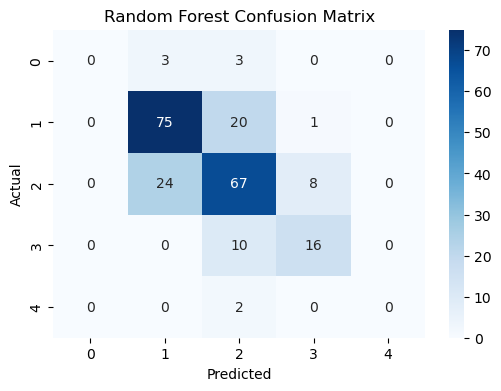

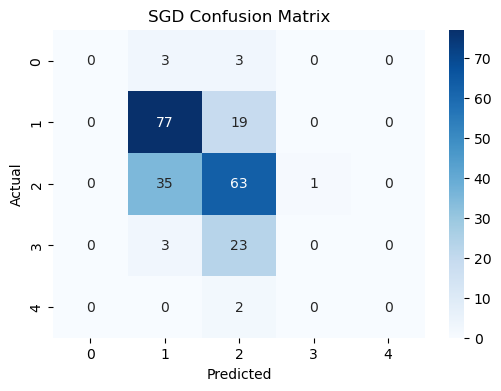

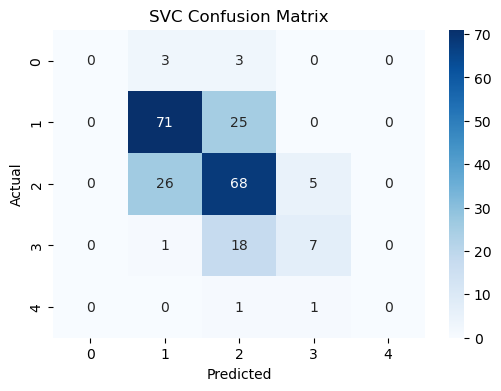

In [30]:
# Plot confusion matrix for each model
for name, model in zip(['Random Forest', 'SGD', 'SVC'], [best_rf_model, sgd_grid_search.best_estimator_, svc_grid_search.best_estimator_]):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f"{name} Confusion Matrix")
    plt.show()

> Confusion Matrices provided detailed class-wise performance, showing areas of strength and misclassification.

### 8.4 ROC Curve

In [31]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# For multiclass setup, you could apply OneVsRest strategy (example only if binary/multiclass ROC is needed)
y_bin = label_binarize(y, classes=[3, 4, 5, 6, 7, 8])  # Adjust classes as necessary
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_scaled, y_bin, test_size=0.2, random_state=42)

In [32]:
# Train OneVsRest classifier
ovr_rf = OneVsRestClassifier(best_rf_model)
y_score = ovr_rf.fit(X_train_bin, y_train_bin).predict_proba(X_test_bin)


In [33]:
# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(y_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

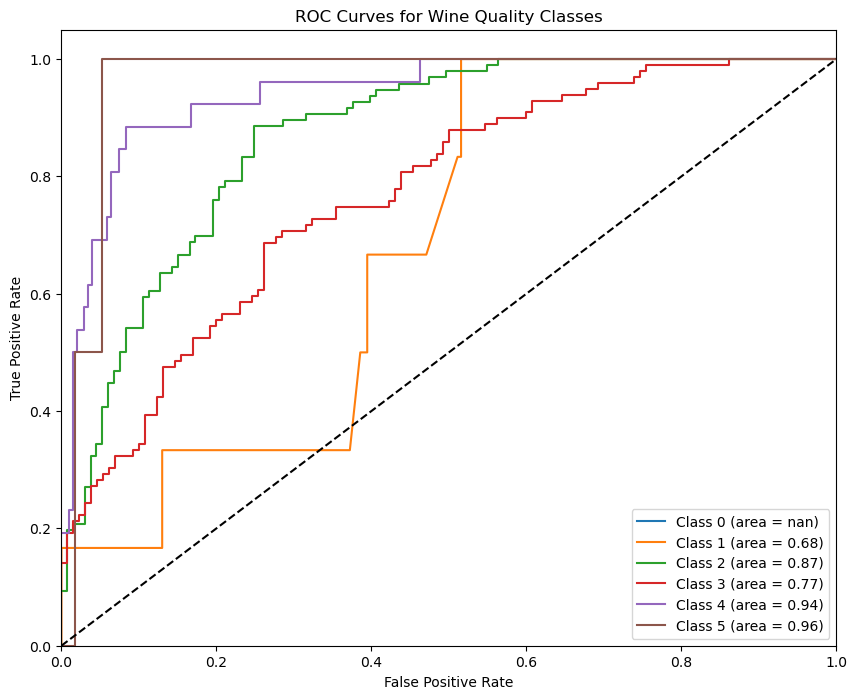

In [34]:

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(y_bin.shape[1]):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Wine Quality Classes')
plt.legend(loc="lower right")
plt.show()

> ROC Curves validated the model's discriminative power across different quality classes.


# Conclusion
The Wine Quality Prediction project successfully demonstrated the application of machine learning techniques in viticulture. Through meticulous data analysis and model evaluation, the Random Forest Classifier emerged as the most effective tool for predicting wine quality based on chemical attributes. The insights gained from feature importance and model performance not only aid in accurate predictions but also provide valuable information for wine producers aiming to enhance quality. Future work can build upon these findings to further refine predictive models and incorporate a broader range of influencing factors.

-> The `Random Forest` model emerged as the best-performing classifier based on metrics such as accuracy and F1-score. This suggests that Random Forest's ensemble approach is particularly effective for predicting wine quality based on the chemical attributes provided.

-> From feature importance, `Alcohol` and `sulphates` were shown to have the highest influence on quality, implying that these properties play a significant role in determining the wine's perceived quality.

-> The confusion matrix analysis revealed that some quality levels were occasionally misclassified. This is likely due to the subtle differences in chemical composition that make it difficult to distinguish between adjacent quality levels.  

-> Optimizing hyperparameters further enhanced the performance of each model, particularly improving the precision and recall scores of the Random Forest and SVC models.